In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import PrecisionRecallDisplay
iris = datasets.load_iris()
print(iris)
irisx = iris.data
irisy = iris.target
print(irisx.shape)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

Iteration 1, loss = 1.07713088
Iteration 2, loss = 1.05689189
Iteration 3, loss = 1.03512979
Iteration 4, loss = 1.05092858
Iteration 5, loss = 1.07755047
Iteration 6, loss = 1.24434004
Iteration 7, loss = 0.91229243
Iteration 8, loss = 0.81292260
Iteration 9, loss = 0.84104370
Iteration 10, loss = 0.65020227
Iteration 11, loss = 0.66087211
Iteration 12, loss = 0.63992566
Iteration 13, loss = 0.62320705
Iteration 14, loss = 0.55965876
Iteration 15, loss = 0.53203313
Iteration 16, loss = 0.48955573
Iteration 17, loss = 0.46244912
Iteration 18, loss = 0.41610278
Iteration 19, loss = 0.38551671
Iteration 20, loss = 0.34286142
Iteration 21, loss = 0.31543761
Iteration 22, loss = 0.28778566
Iteration 23, loss = 0.27090602
Iteration 24, loss = 0.25788233
Iteration 25, loss = 0.24892976
Iteration 26, loss = 0.24127164
Iteration 27, loss = 0.23431846
Iteration 28, loss = 0.22757803
Iteration 29, loss = 0.22098663
Iteration 30, loss = 0.21450075
Iteration 31, loss = 0.20811483
Iteration 32, los

C:\Users\darin\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


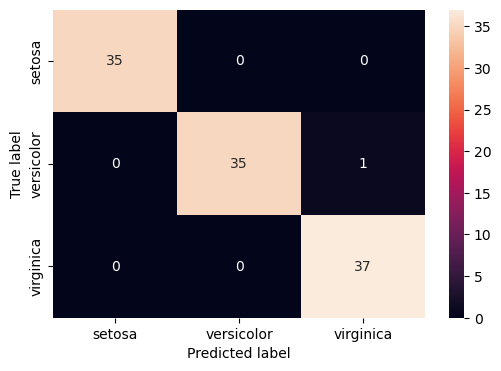

In [4]:
#Creating our training and test data. In the actual data set, our data is the actual details of the flowers, and
#our target is just the array in the dataset with the actual values we want to get; 0, 1, and 2
X = iris.data
y = iris.target
target_names = iris.target_names
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.72, random_state=1)

#Function for visualisation of confusion matrix
def confusionM(y_test, y_predict, target_names):
    cMatrix = confusion_matrix(y_test, y_predict)
    df_cm = pd.DataFrame(cMatrix,index=target_names,columns=target_names)
    plt.figure(figsize = (6,4))
    cm = sns.heatmap(df_cm,annot=True,fmt="d")
    cm.yaxis.set_ticklabels(cm.yaxis.get_ticklabels(),rotation=90)
    cm.xaxis.set_ticklabels(cm.xaxis.get_ticklabels(),rotation=0)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

#Standardization of the test and training data 
sc = StandardScaler()
sc.fit(X_train)
X_train_scaled = sc.transform(X_train)
X_test_scaled = sc.transform(X_test)

#Creation of the perceptron, still figuring out everything with this
perceptron = MLPClassifier(activation='logistic', solver='sgd', verbose=True, learning_rate_init=0.2)
perceptron.fit(X_train_scaled, y_train)

y_predict = perceptron.predict(X_test_scaled)


#Prints out the accuracy of the perceptron and the visualization of the results
#The confusion matrix will tell us how many the model got right, and more importantly WHICH ones it got wrong
print('Accuracy: %.3f' % accuracy_score(y_test, y_predict))
print('Accuracy: %.3f' % perceptron.score(X_test_scaled, y_test))

confusionM(y_test, y_predict, target_names)